In [8]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
import os

In [12]:
results_folder = 'messungen/'

result_list = os.listdir(results_folder)

print("Anzahl an Ergebnissen:", len(result_list))

test_result = result_list[0]

print("Erstes Ergebnis:", test_result)

Anzahl an Ergebnissen: 1
Ergebnis: results_from_2024-10-14_18-30-34.h5


In [14]:
result_filename = results_folder + test_result

channel_index = 0

num_time_samples = 5000  

Shape von 'time_data': (401664, 16)
Abtastrate: 44100.0 Hz


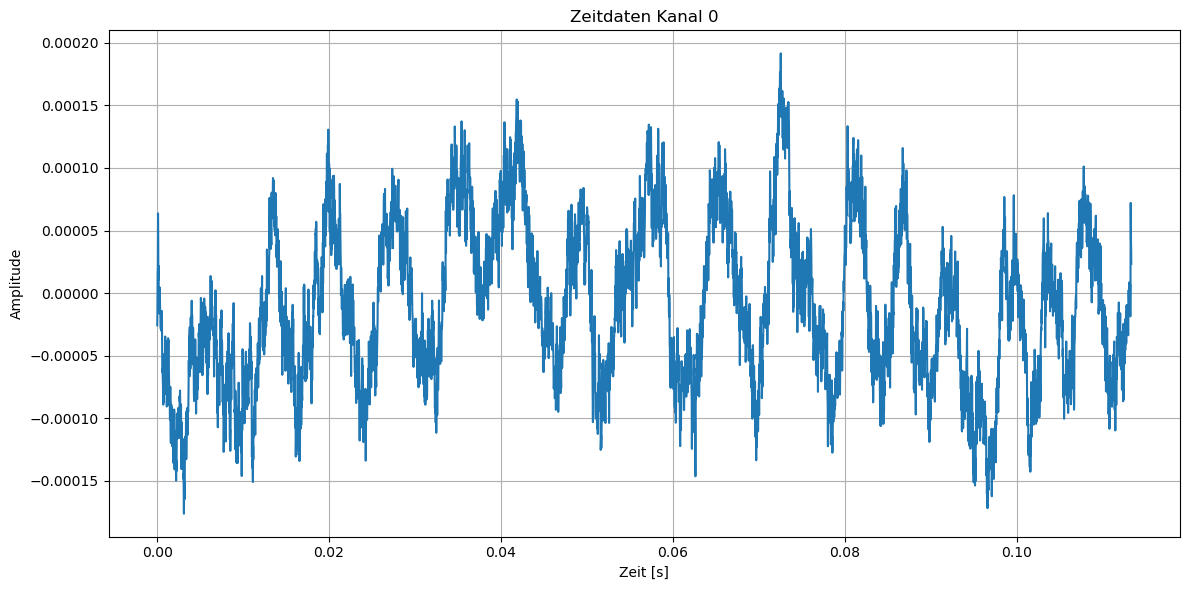

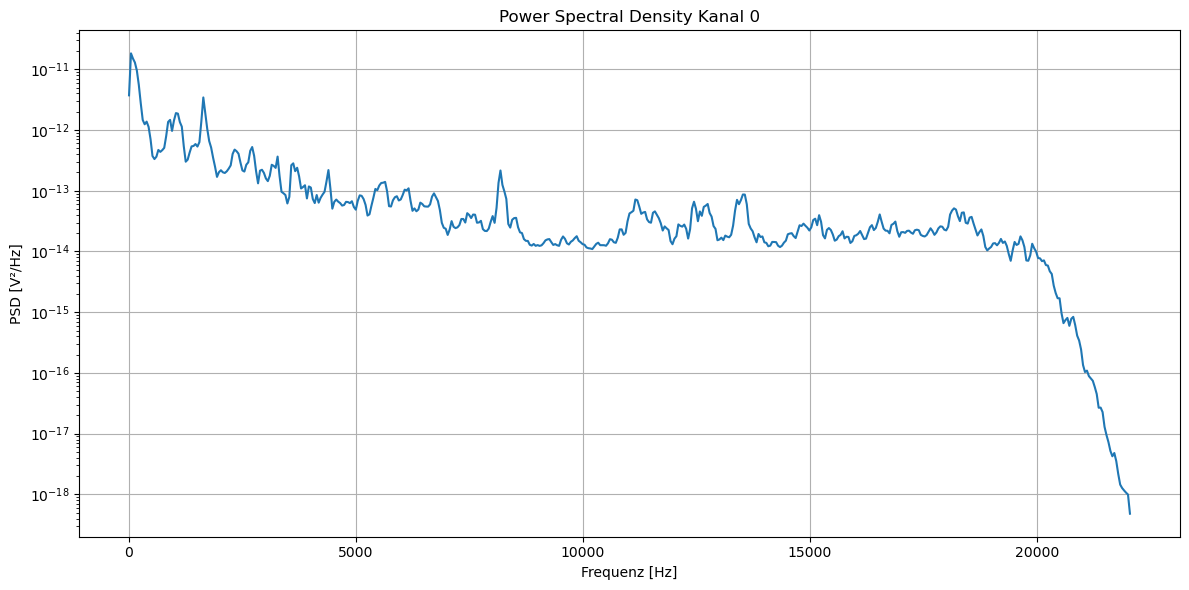

In [16]:
with h5py.File(result_filename, 'r') as hdf5_file:

    time_data = hdf5_file['time_data']
    sample_freq = time_data.attrs['sample_freq']

    print(f"Shape von 'time_data': {time_data.shape}")
    print(f"Abtastrate: {sample_freq} Hz")
    
    channel_data = time_data[:, channel_index]
    
    num_samples = min(num_time_samples, channel_data.shape[0])
    time_vector = np.arange(num_samples) / sample_freq
    
    plt.figure(figsize=(12, 6))
    plt.plot(time_vector, channel_data[:num_samples])
    plt.xlabel('Zeit [s]')
    plt.ylabel('Amplitude')
    plt.title(f'Zeitdaten Kanal {channel_index}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    freqs, psd = welch(channel_data, fs=sample_freq, nperseg=1024)
 
    plt.figure(figsize=(12, 6))
    plt.semilogy(freqs, psd)
    plt.xlabel('Frequenz [Hz]')
    plt.ylabel('PSD [V²/Hz]')
    plt.title(f'Power Spectral Density Kanal {channel_index}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()